In [1]:
# Task1: Data preprocessing and Data exploration # Student ID : 20018580

In [2]:
# a) Used Pandas (Panel Data) to load the dataset and identify # of rows in Training data set and Test data set 

In [3]:
import pandas as pd 

In [4]:
trndata = pd.read_csv(r"C:\Users\admin\anaconda3\Lib\site-packages\PIL\trndata.csv")
tstdata = pd.read_csv(r"C:\Users\admin\anaconda3\Lib\site-packages\PIL\tstdata.csv")

In [5]:
# To view the Training data set, first five rows

In [6]:
trndata.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
0,0.3315,0.2156,0.6802,0.1434,0.6825,0.2720,0.6223,0.2092,0.7961,0.1530,0.5856,0.2573,1
1,0.0939,1.0089,0.0365,0.6944,0.0908,0.4961,0.0722,0.6521,-0.0130,0.6085,0.0631,0.6597,2
2,0.5184,0.2283,0.5300,0.6884,0.7456,0.6171,0.6136,0.5928,0.7678,0.6130,0.6705,0.5202,1
3,0.4208,0.6740,0.1651,0.7592,0.1810,0.5448,0.1707,0.7554,0.1635,0.5492,0.2598,0.6455,2
4,0.3130,0.6465,0.5908,0.6924,0.7664,0.6262,1.7177,0.0150,0.0851,1.9046,-0.0165,0.0221,3


In [7]:
print(trndata.shape)

(1000, 13)


In [8]:
# Training data set : Rows and columns is 1000 and Columns is 13

In [9]:
# Training set : calculating the number of Features 

In [10]:
print("Number of features in the training set: "+ str(len(trndata.iloc[:, :-1].axes[1])))

Number of features in the training set: 12


In [11]:
print(tstdata.shape)

(300, 13)


In [12]:
# Test data set : Rows and columns is 300 and Columns is 13

In [13]:
# Test set :  calculating the number of Features 

In [14]:
print("Number of features in the test set: "+ str(len(tstdata.iloc[:, :-1].axes[1])))

Number of features in the test set: 12


In [71]:
# Training set : Number of data points in each class 

In [15]:
trndata["L"].value_counts()

1    343
3    341
2    316
Name: L, dtype: int64

In [16]:
# Test set : Number of data points in each class 

In [17]:
tstdata['L'].value_counts()

3    104
2     98
1     98
Name: L, dtype: int64

In [18]:
# Random permutations using shuffle

In [19]:
from sklearn.utils import shuffle
training_set_i = shuffle(trndata, random_state = 20018580)

In [20]:
#Shuffle returns - Sequence of shuffled copies of the collections. The original arrays are not impacted.

In [21]:
# Pandas head() method is used to return top n (5 by default) - just to verify the data sample

In [22]:
training_set_i.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
42,0.8427,0.2270,1.0943,0.3023,1.2949,0.2022,1.8863,-0.1803,2.0447,-0.0478,0.0029,1.7328,3
208,0.4360,0.3713,0.6214,0.6574,0.7203,0.7235,0.5825,0.6956,0.7206,0.7458,0.6731,0.5917,1
731,0.6361,0.0816,0.9489,0.1881,1.0334,0.2630,0.9601,0.1715,1.0037,0.3191,1.1462,-0.0483,1
584,0.4649,0.6439,0.7775,0.6826,0.9982,0.5638,1.7573,-0.0225,-0.0158,2.0113,0.0497,1.6713,3
932,0.2915,0.6952,0.5862,0.7160,0.8323,0.5673,1.6712,0.0701,0.0129,1.9853,0.0777,-0.0911,3


In [23]:
# d>  Scatter plot for the training set to compare two features F1 and F5

In [24]:
# Reference for different styles: https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.13-Plot-Styles/

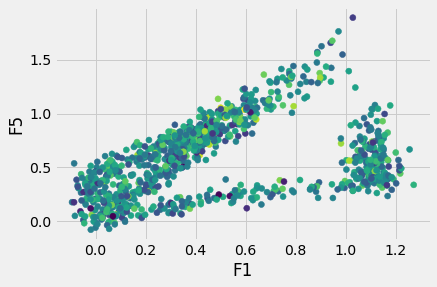

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

#categories = np.array([0, 1])
#colormap = np.array(['r', 'g'])
#colors = ['#2300A8', '#00A658']
colors = np.random.randn(1000) 

plt.scatter(trndata['F1'], trndata['F5'], c =colors)
#plt.scatter(trndata['F1'],trndata['F5'],c = None)
#plt.scatter(trndata['F1'],trndata['F5'], color ='green')
#plt.scatter(trndata['F1'], trndata['F5'], c = trndata['L'])


plt.xlabel("F1")
plt.ylabel("F5")

plt.show()

In [26]:
############################# Task 2 ##########################################

In [27]:
#Task 2  PCA on Training_set_i
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [28]:
#  Steps of PCA
# 1> Center and Scale the Data (Center=Avg value for each item will be zero; scaling=std deviation for each value will be 1)
# 2> create PCA object and we can use this later as well
# 3> Calculate loading scores and the variation each Principle component accounts for


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = training_set_i.iloc[:,:-1]
cs = StandardScaler().fit(data)
scaled_data = cs.transform(data)
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8','PCA_9','PCA_10','PCA_11','PCA_12']

In [30]:
# First we fit (center and Scale) on training dataset
# Second Transform on the training dataset
# get the values from the training set
# Transform / Apply on the TEST dataset

In [31]:
test_data = tstdata.iloc[:,:-1]
scaled_test = cs.transform(test_data)
pca_test = pca.transform(scaled_test)

In [32]:
import seaborn as sns

tr_data = pd.DataFrame(pca_data,columns = columns)
tr_data = pd.concat([tr_data, training_set_i[['L']]], axis = 1)

ts_data = pd.DataFrame(pca_test,columns = columns)
ts_data = pd.concat([ts_data, tstdata[['L']]], axis = 1)

In [94]:
# Plotting PCA_1 and PCA_2 graphs

<function matplotlib.pyplot.show(close=None, block=None)>

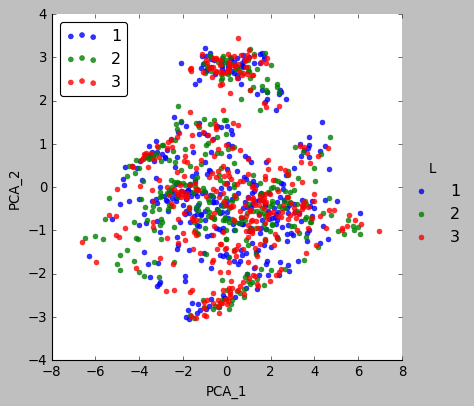

In [33]:
plt.style.use('classic')
sns.lmplot(x = 'PCA_1',y = 'PCA_2',data=tr_data, fit_reg=False, hue='L')
plt.legend(loc='upper left',fancybox=True,frameon=True)
plt.show

In [34]:
# Variance captured by each PCA - Create a graph using matplotlib

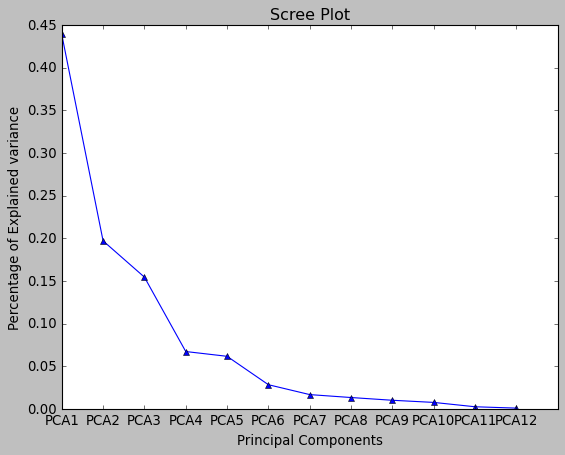

In [35]:
fig = plt.figure()
scrplt = plt.gca()

plt.plot(pca.explained_variance_ratio_,marker = '^')
scrplt.set_xticks(range(0,12))
scrplt.set_title("Scree Plot")
columns2 = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12']
scrplt.set_xticklabels(columns2)
scrplt.set_xlabel("Principal Components")
scrplt.set_ylabel("Percentage of Explained variance")
plt.show()

In [36]:
import numpy as np
columns1 = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8','PCA_9','PCA_10','PCA_11','PCA_12']
cummulative = pd.DataFrame(np.cumsum(pca.explained_variance_),index = columns1)
cummulative.columns = ['Explained Variance']
cummulative

,Explained Variance
PCA_1,5.273139
PCA_2,7.639774
PCA_3,9.495959
PCA_4,10.304931
PCA_5,11.046627
PCA_6,11.388395
PCA_7,11.591100
PCA_8,11.752524
PCA_9,11.875415
PCA_10,11.968061


In [37]:
cummulative?

In [38]:
#Task2 - d - Plot two subplots in one figure - PCA1 and 2 against Training Data set and Test Data set

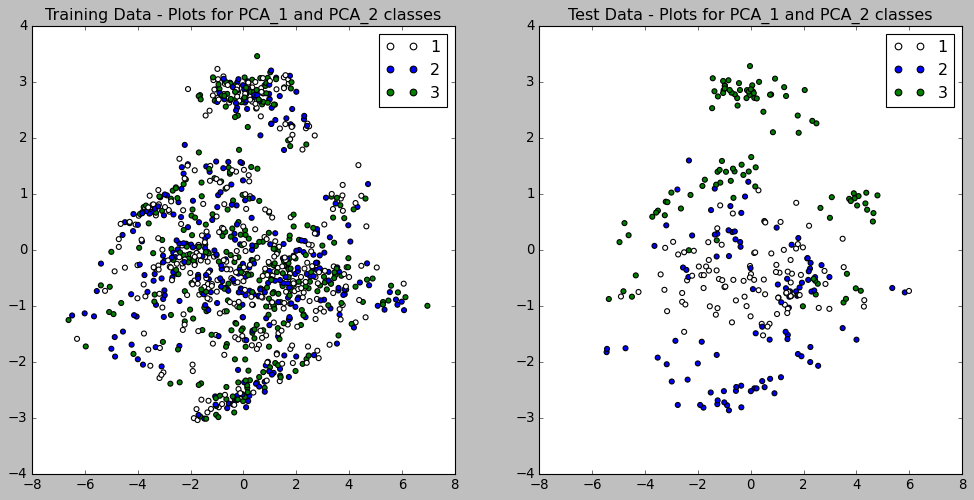

In [41]:
from matplotlib.colors import ListedColormap

plt.style.use('classic')

fig = plt.figure(2,figsize = (15,7))

axis1 = fig.add_subplot(1,2,1)
axis2 = fig.add_subplot(1,2,2)

classes = ['1', '2', '3']
colours1 = ListedColormap(['white','blue','green'])
#plt.title("title")
#axis1.title("Training Data - Plots for PCA_1 and PCA_2 classes")
colours2 = ListedColormap(['white','blue','green'])
#colours2 = ListedColormap(['grey','r','black'])
#axis.title("Test Data - Plots for PCA_1 and PCA_2 classes")

scatter1 = axis1.scatter(tr_data.PCA_1,tr_data.PCA_2,c = tr_data.L, cmap = colours1)
axis1.set_title("Training Data - Plots for PCA_1 and PCA_2 classes")
scatter2 = axis2.scatter(ts_data.PCA_1,ts_data.PCA_2,c = ts_data.L, cmap = colours2)
axis2.set_title("Test Data - Plots for PCA_1 and PCA_2 classes")


axis1.legend(handles=scatter1.legend_elements()[0], labels=classes)
axis2.legend(handles=scatter2.legend_elements()[0], labels=classes)
plt.show()

##########################       Task 3      ######################################

In [42]:
k = len(training_set_i)
k

1000

In [43]:
validation_set = training_set_i.tail(300)
print('Validation set shape(Rown X cols):', validation_set.shape)

Validation set shape(Rown X cols): (300, 13)


In [44]:
#### we can also use [700:1000,:] to extract the last 300 rows 

In [45]:
training_set_ii = training_set_i.head(k-300)
print('Training set ii shape(Rown X cols):',training_set_ii.shape)

Training set ii shape(Rown X cols): (700, 13)


In [46]:
#### we can also use [:700,:] to extract the first 700 rows 

######################## TASK 4  #############################################

In [47]:
######  Training with Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
#Import linear regression from sklearn package
from sklearn.metrics import mean_squared_error, r2_score
std_scalar = StandardScaler()

x = training_set_ii.iloc[:,:-1]
y = training_set_ii['L']

x_val = validation_set.iloc[:,:-1]
y_val = validation_set['L']

#Using the Standard scalar funtion 

param = std_scalar.fit(x)
scaled_x = std_scalar.transform(x)
scaled_x_val = std_scalar.transform(x_val)

In [52]:
# Use training_set_ii to train Linear Regression models with i # Features, increment from 1 to 12

In [53]:
#Ordinary least squares Linear Regression.

#LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize
#the residual sum of squares between the observed targets in the dataset, 
#and the targets predicted by the linear approximation
#Reference https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

training_r2 = []
validation_r2 = []

linear_regression = LinearRegression()

#i = 1
###  using iteration / loop logic to train model with features increasing step by step
for i  in  range(1,12):
#while i < 13:
    xaxis_data = scaled_x[:,:i]
    xaxis_validation_data = scaled_x_val[:,:i]
#  i += 1
    y_predict = linear_regression.fit(xaxis_data, y).predict(xaxis_data)
    y_value_predict = linear_regression.predict(xaxis_validation_data)
# Predictions should be rounded to the nearest integer. 

    Rounded_Validation = np.round(y_value_predict)
    Rounded_Training = np.round(y_predict)

    validation_r2.append(r2_score(y_val,Rounded_Validation))
    training_r2.append(r2_score(y,Rounded_Training))

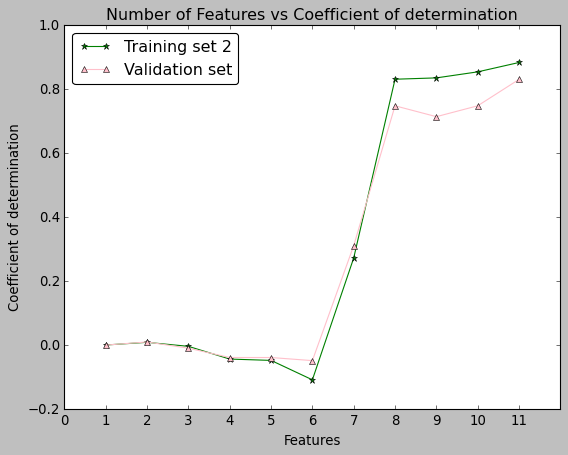

In [54]:
plt.style.use('classic')
plt.title("Number of Features vs Coefficient of determination")
plt.plot(range(1, 12),np.array(training_r2),marker = '*', c = 'green', label = 'Training set 2')
plt.plot(range(1, 12), np.array(validation_r2),marker = '^', c = 'pink', label = 'Validation set')
plt.xlabel("Features")
plt.ylabel("Coefficient of determination")
plt.xticks(range(0, 12))
plt.legend(loc='upper left',fancybox=True,frameon=True)
plt.show()

In [55]:
# 4 c : Number of features selected is 8, as there is very slight change from there after
# and the maximum variation we can see is from 6 to 8

In [56]:
#Scaling the dataset - training_set_i, and finding the performance

In [109]:
#Ordinary least squares Linear Regression.

#LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize
#the residual sum of squares between the observed targets in the dataset, 
#and the targets predicted by the linear approximation

regression = LinearRegression()
#Scaling the data training set
regression.fit(scaled_data[:,:8],training_set_i['L'])


y_predict_train_set_i = regression.predict(scaled_data[:,:8])
y_value_predict_train_set_i = regression.predict(scaled_test[:,:8])

# used Rouning funtion
Rounded_Training_score = np.round(y_predict_train_set_i)
Rounded_Testing_score = np.round(y_value_predict_train_set_i)

print('Training set score :',r2_score(training_set_i['L'], Rounded_Training_score))
print('Testing set score  :',r2_score(tstdata['L'], Rounded_Testing_score))

Training set score : 0.8143263995695881
Testing set score  : 0.8563503071131365


In [110]:
########################### TASK 5   ##################

a) Summary : 

Task_1 : Loaded 2 datasets, identified the number of features, classes and respective data points. Scattered a plot using  two features F1 and F5

Task_2 : Calculated PCA on training_set_1 and plotted PCA1, PCA2. Variance by PCAs we observe that first 4 PCAs have the maximum (nearly 90%) variance. Plotted two plots in one figure for trainingset and testset.

Task_3 : Divide the training_set_1 into validationset and Training_set_II

Task_4 : Used training_set_II to train 1 Linear regression model with 1 feature. Incremeted this to reach 12 models with 12 features using the looping structure in python. Plotted learning curve for Training_set_II and validationset and as 8 features gives the optimal performance, used this model with 8 features to train the testdataset.

b) Instead of using Linear regression, which is generally used for predicting the continuous values, we can use other regression models like logistic regression.  

In [100]:
###############   END    ################